In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
df = pd.read_csv('tracingResultsCore.csv')
df

,benchmark,run,result
0,quadratic,baseline,785
1,quadratic,traced,791
2,quadratic,tracedLVNTDCE,449
3,primes-between,baseline,574100
4,primes-between,traced,574102
...,...,...,...
112,fizz-buzz,traced,3656
113,fizz-buzz,tracedLVNTDCE,2202
114,bitwise-ops,baseline,1690
115,bitwise-ops,traced,1690


In [55]:
df = df.replace("incorrect", 0)
df = df.replace("timeout", 0)
df

,benchmark,run,result
0,quadratic,baseline,785
1,quadratic,traced,791
2,quadratic,tracedLVNTDCE,449
3,primes-between,baseline,574100
4,primes-between,traced,574102
...,...,...,...
112,fizz-buzz,traced,3656
113,fizz-buzz,tracedLVNTDCE,2202
114,bitwise-ops,baseline,1690
115,bitwise-ops,traced,1690


In [56]:
df = df.pivot(index='benchmark', columns='run', values='result')
df = df.applymap(float)
df

run,baseline,traced,tracedLVNTDCE
benchmark,,,
ackermann,1464231.0,2067798.0,2067798.0
armstrong,133.0,155.0,152.0
binary-fmt,100.0,137.0,137.0
birthday,484.0,479.0,221.0
bitshift,167.0,191.0,150.0
bitwise-ops,1690.0,1690.0,1689.0
catalan,659378.0,836525.0,836525.0
check-primes,8468.0,8710.0,6038.0
collatz,169.0,169.0,169.0


In [57]:
df.transform

<bound method DataFrame.transform of run                          baseline     traced  tracedLVNTDCE
benchmark                                                      
ackermann                   1464231.0  2067798.0      2067798.0
armstrong                       133.0      155.0          152.0
binary-fmt                      100.0      137.0          137.0
birthday                        484.0      479.0          221.0
bitshift                        167.0      191.0          150.0
bitwise-ops                    1690.0     1690.0         1689.0
catalan                      659378.0   836525.0       836525.0
check-primes                   8468.0     8710.0         6038.0
collatz                         169.0      169.0          169.0
digital-root                    247.0      247.0          247.0
dot-product                      88.0       88.0           88.0
euclid                          563.0      563.0          417.0
fact                            229.0      331.0          249.0
fac

In [58]:
def frac(series):
    if series['baseline'] != 0:
        series['traced'] = series['traced']/series['baseline']
        series['tracedLVNTDCE'] = series['tracedLVNTDCE'] / series['baseline']
        series['baseline'] = 1.0

In [59]:
df.drop(df[df.tracedLVNTDCE == 0.0].index, inplace=True)
df.drop(df[df.traced == 0.0].index, inplace=True)


In [60]:
df.apply(axis=1, func=frac)

benchmark
ackermann                     None
armstrong                     None
binary-fmt                    None
birthday                      None
bitshift                      None
bitwise-ops                   None
catalan                       None
check-primes                  None
collatz                       None
digital-root                  None
dot-product                   None
euclid                        None
fact                          None
factors                       None
fitsinside                    None
fizz-buzz                     None
gcd                           None
hanoi                         None
is-decreasing                 None
lcm                           None
loopfact                      None
mod_inv                       None
orders                        None
palindrome                    None
pascals-row                   None
perfect                       None
primes-between                None
quadratic                     None
recfact   

In [61]:
df

run,baseline,traced,tracedLVNTDCE
benchmark,,,
ackermann,1.0,1.412208,1.412208
armstrong,1.0,1.165414,1.142857
binary-fmt,1.0,1.370000,1.370000
birthday,1.0,0.989669,0.456612
bitshift,1.0,1.143713,0.898204
bitwise-ops,1.0,1.000000,0.999408
catalan,1.0,1.268658,1.268658
check-primes,1.0,1.028578,0.713037
collatz,1.0,1.000000,1.000000


In [62]:
df.describe()

run,baseline,traced,tracedLVNTDCE
count,37.0,37.000000,37.000000
mean,1.0,1.101070,0.965154
std,0.0,0.170796,0.271132
min,1.0,0.956522,0.362069
25%,1.0,1.000000,0.869565
50%,1.0,1.001095,1.000000
75%,1.0,1.165414,1.087336
max,1.0,1.595960,1.595960


<AxesSubplot:xlabel='benchmark'>

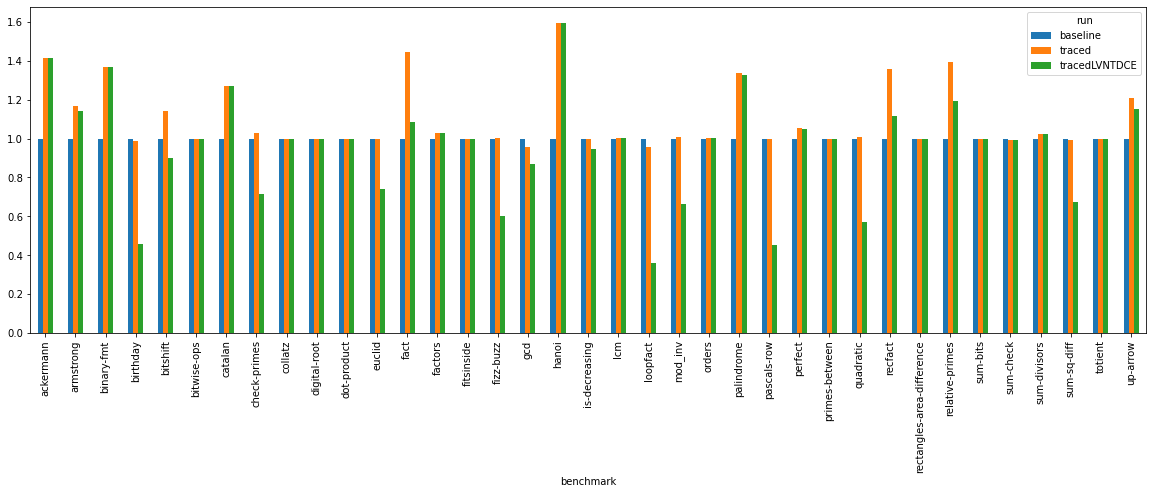

In [63]:
df.plot( kind='bar', figsize=(20, 6))